In [1]:
import numpy as np
import matplotlib.pyplot as plt
import burst_detector as bd
import seaborn as sns
from scipy.stats import wasserstein_distance
import pandas as pd
import math

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [485]:
n_chan = 385
times = np.load('../../data/neuropixels_dohoung/KS2.5/phy_in/spike_times.npy').flatten()
clusters = np.load('../../data/neuropixels_dohoung/KS2.5/phy_in/spike_clusters.npy').flatten()
mean_wf = np.load("../../data/neuropixels_dohoung/KS2.5/phy_in/mean_waveforms.npy")
templates = np.load ("../../data/neuropixels_dohoung/KS2.5/phy_in/templates.npy")
chan_map = np.load("../../data/neuropixels_dohoung/KS2.5/phy_in/channel_map.npy")
peak_chans = np.argmax(np.max(mean_wf, 2) - np.min(mean_wf,2),1)

counts = bd.spikes_per_cluster(clusters)
labels = pd.read_csv("../../data/neuropixels_dohoung/KS2.5/phy_in/cluster_group.tsv", sep="\t")

In [6]:
# load raw data
rawData = np.memmap("../../data/neuropixels_dohoung/KS2.5/catgt_ANM480363_20210527_pfc320_hpc180_g0/ANM480363_20210527_pfc320_hpc180_g0_imec1/ANM480363_20210527_pfc320_hpc180_g0_tcat.imec1.ap.bin", dtype='int16', mode='r')
data = np.reshape(rawData, (int(rawData.size/n_chan), n_chan))

### classic spike detection

In [ ]:
start = 53823600
seg = data[start:start+600, 310:324]
time_seg = times[(times > start) & (times < start + 600)]
clust_seg = clusters[(times > start) & (times < start + 600)]
peak_seg = peak_chans[clust_seg]

In [229]:
high = np.abs(seg) > 120
high_near = np.zeros_like(high)

In [230]:
starts_all = []; ends_all = []

In [231]:
for j in range(high.shape[1]):
    starts = []
    ends = []
    for i in range(high.shape[0]):
        if high[i, j]:
            # high_near[i-20:i+20, j] = True
            starts.append(i-20)
            ends.append(i+20)
    starts_all.append(starts)
    ends_all.append(ends)

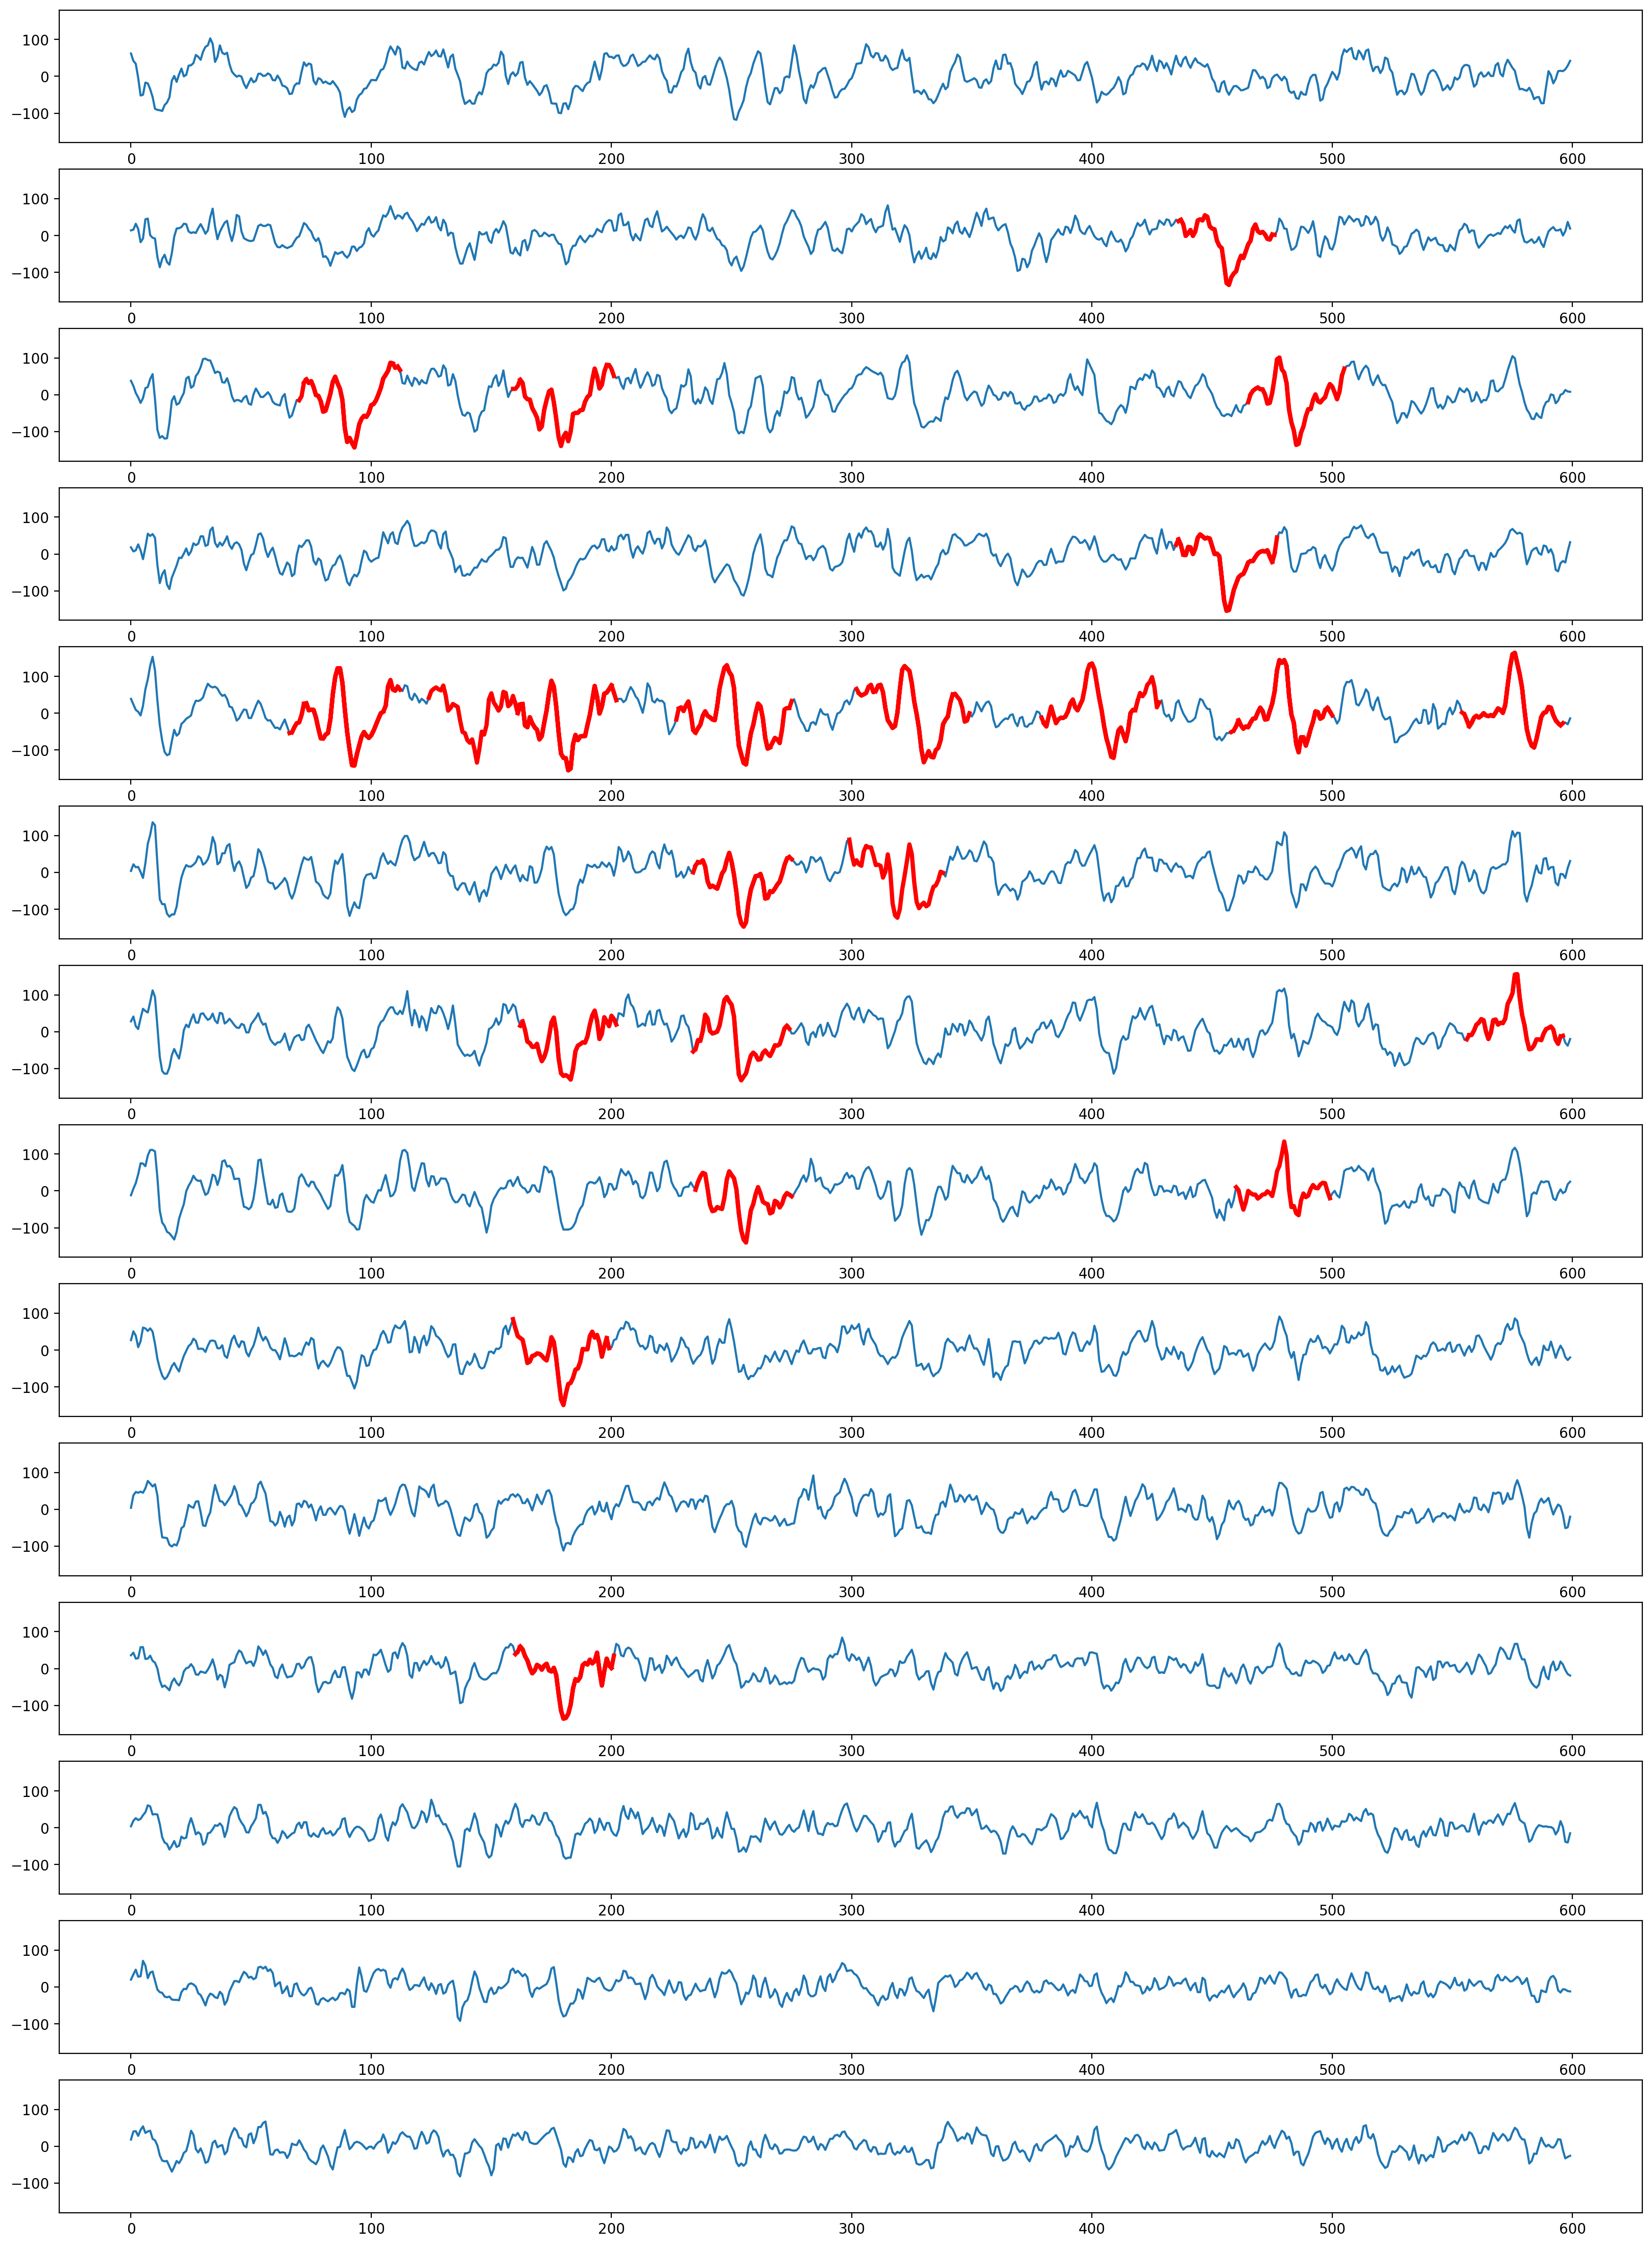

In [233]:
plt.figure(figsize=(20,28))
for i in range(14):
    plt.subplot(14, 1, i+1)
    plt.plot(seg[:, i]); plt.ylim([-180, 180])
    for j in range(len(starts_all[i])):
        if (ends_all[i][j] < seg.shape[0]) and (starts_all[i][j] > 0):
            plt.plot(np.arange(starts_all[i][j],ends_all[i][j]), seg[starts_all[i][j]:ends_all[i][j], i], color='red', linewidth=3)

plt.savefig("../../figures/paper/classic_thresh.svg", transparent=True)


### classic feature extraction

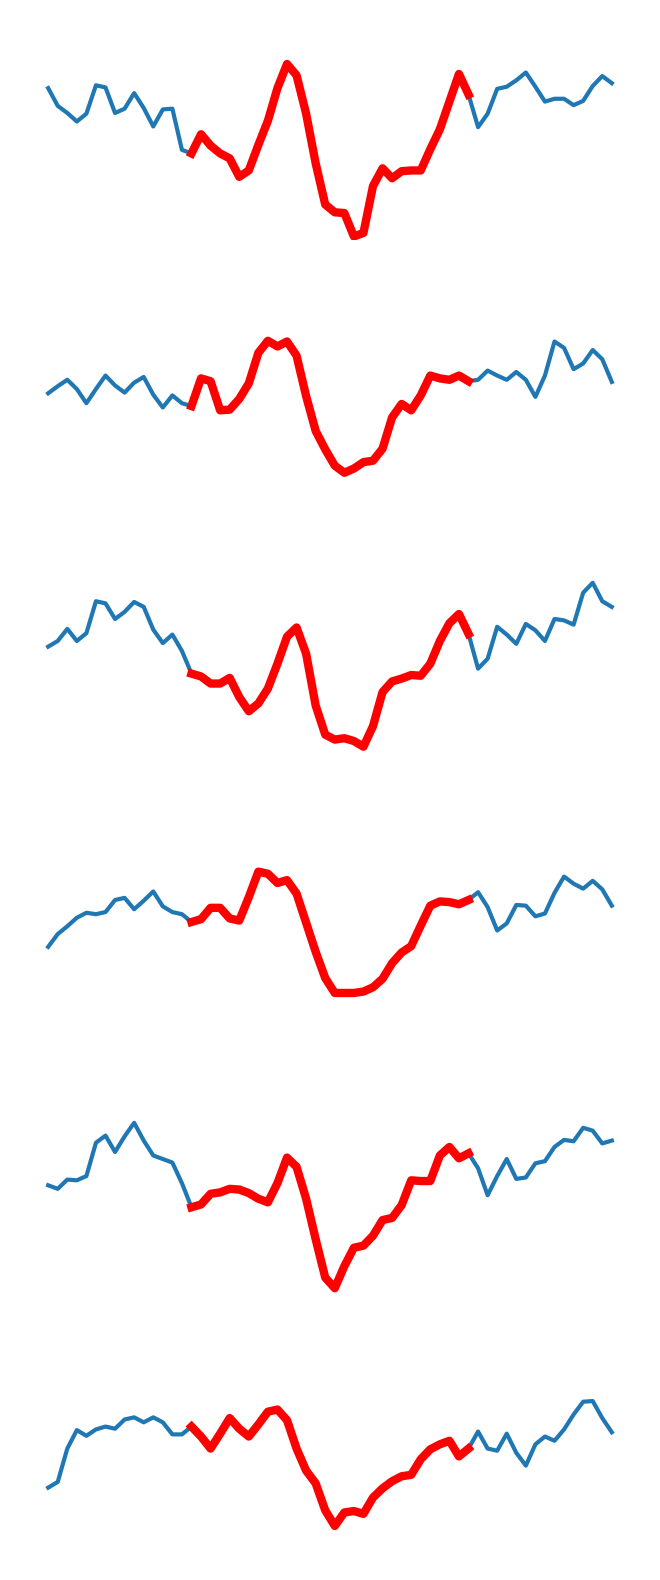

In [311]:
plt.figure(figsize=(4,10))
for i in range(4, 10):
    plt.subplot(6,1,i+1-4)
    plt.plot(seg[160-10:160+50, i]);
    plt.plot(np.arange(15,45),seg[160+5:160+35, i], color='r', linewidth=3);
    plt.axis('off'); plt.ylim([-160, 150])
    
plt.savefig("../../figures/paper/classic_snip3.svg", transparent=True)

In [306]:
g1 = np.random.randn(500)*1 -1
g2 = np.random.randn(500)*1.3 + 2

g3 = np.random.randn(500)*.7 +5
g4 = np.random.randn(500)*1.32 - 3

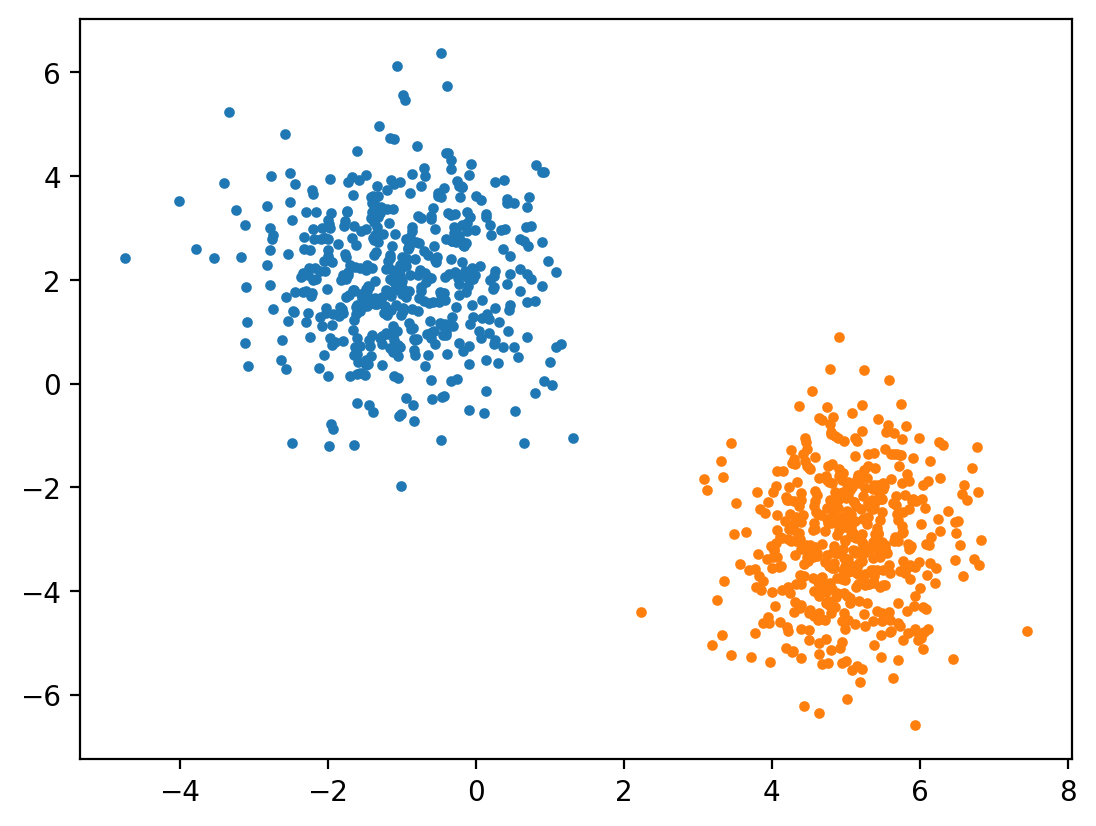

In [262]:
plt.scatter(g1, g2, s=8)
plt.scatter(g3, g4, s=8)
plt.savefig("../../figures/paper/classic_feature.svg", transparent=True)

### template learning

In [386]:
np.nonzero((peak_chans_temp >= 310) & (peak_chans_temp < 318))

(array([ 73,  74,  75,  76,  77,  78,  79,  80, 146, 147], dtype=int64),)

In [355]:
clust_seg

array([ 78,  93, 129, 113,  54, 148,  78, 131,  53,  47,  27, 139,  27,
        40,  78,  37,  24,  33,  49,  89,  44,  22, 113,  42,  92,  78,
        47,  54, 147, 116,  48,  67,  39,  42,  93, 149,  78,  70,  53,
       100, 145,  78,  38,  47,  42, 132,  91,  27,  78, 129,  53, 148,
       107, 163,  41, 113, 122,  44, 148,  78, 101,  45], dtype=uint32)

In [350]:
peak_seg

array([314, 352, 123, 362, 173, 337, 314, 123, 173, 167, 117, 303, 117,
       125, 314, 123, 112, 119, 167, 344, 157, 105, 362, 148, 348, 314,
       167, 173, 316, 363, 161, 302, 123, 148, 352, 345, 314, 303, 173,
       354, 303, 314, 123, 167, 148, 123, 347, 117, 314, 123, 173, 337,
       360, 354, 126, 362, 109, 157, 337, 314, 348, 156], dtype=int64)

In [376]:
clust_seg[(peak_seg < 319) & (peak_seg >= 312)]

array([ 78,  78,  78,  78, 147,  78,  78,  78,  78], dtype=uint32)

In [315]:
templates.shape

(165, 82, 383)

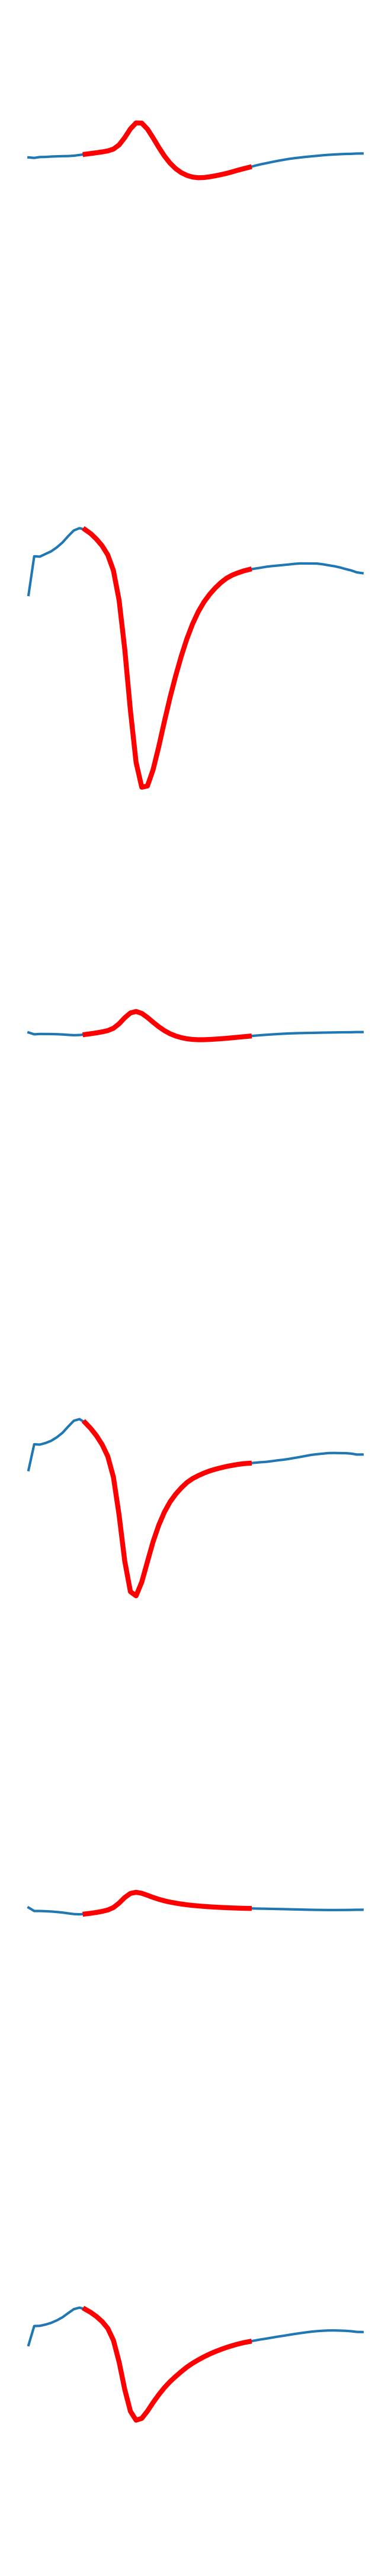

In [388]:
plt.figure(figsize=(4,28))
for i in range(311, 317):
    plt.subplot(6,1,i+1-311)
    plt.plot(templates[76,20:80,i])
    plt.plot(np.arange(10, 40), templates[76,30:60,i], color='r', linewidth=3)
    plt.ylim([templates[78].min()-.1, templates[76].max()+.1])
    plt.axis("off")
    plt.savefig("../../figures/paper/temp_76.svg", transparent=True)

In [363]:
seg_short = data[start+300:start+600, 312:318]

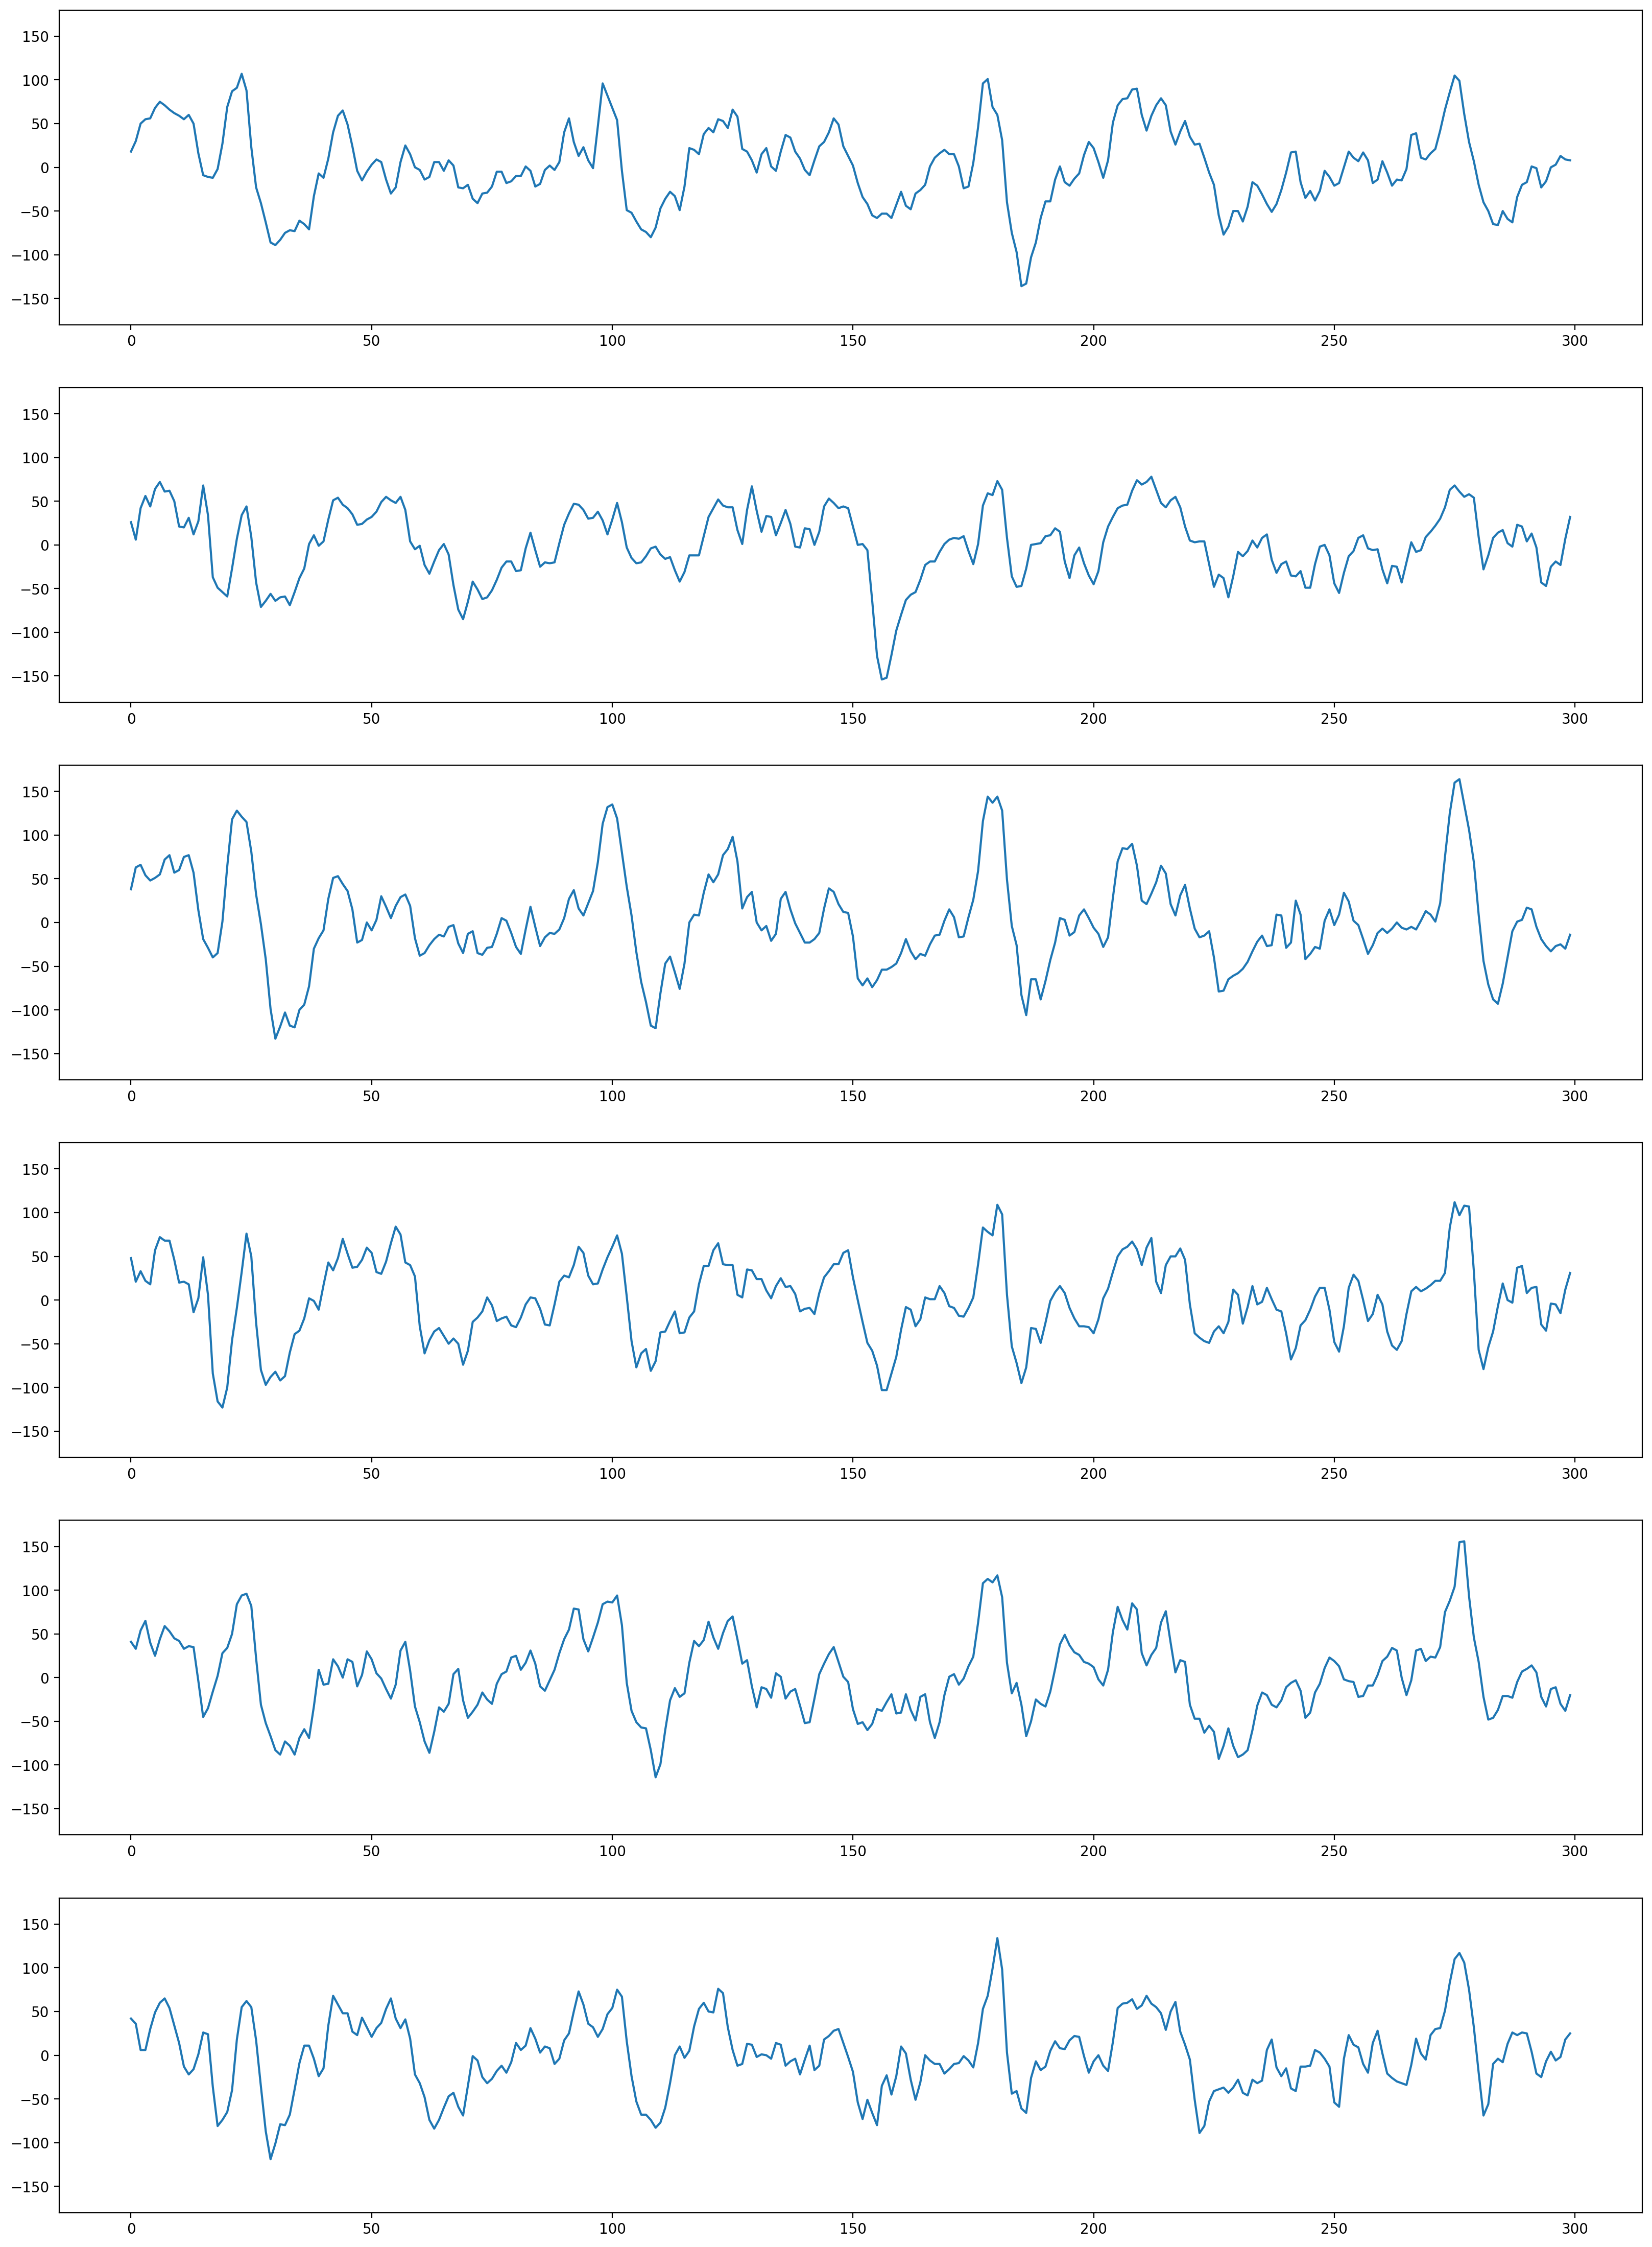

In [366]:
plt.figure(figsize=(20,28))
for i in range(6):
    plt.subplot(6, 1, i+1)
    plt.plot(seg_short[:, i]); plt.ylim([-180, 180])

plt.savefig("../../figures/paper/template_data.svg", transparent=True)

In [486]:
temp76 = templates[76,20:80,311:317] 
temp78 = templates[78,20:80,311:317]
temp147 = templates[147,20:80,311:317]

# temp76 *= np.abs(seg_short).max()/np.abs(temp76).max()
# temp78 *= np.abs(seg_short).max()/np.abs(temp78).max()
# temp147 *= np.abs(seg_short).max()/np.abs(temp147).max()

In [487]:
temp76.max()

0.084786765

In [488]:
def convolve_template(seg, temp):
    conv = np.zeros_like(seg, dtype='float64')
    for i in range(temp.shape[1]):
        conv[:,i] = np.convolve(seg[:,i], temp[:,i], mode='same')
        
    return conv.sum(axis=1)

In [489]:
cv76 = convolve_template(seg_short, temp76)
cv78 = convolve_template(seg_short, temp78)
cv147 = convolve_template(seg_short, temp147)

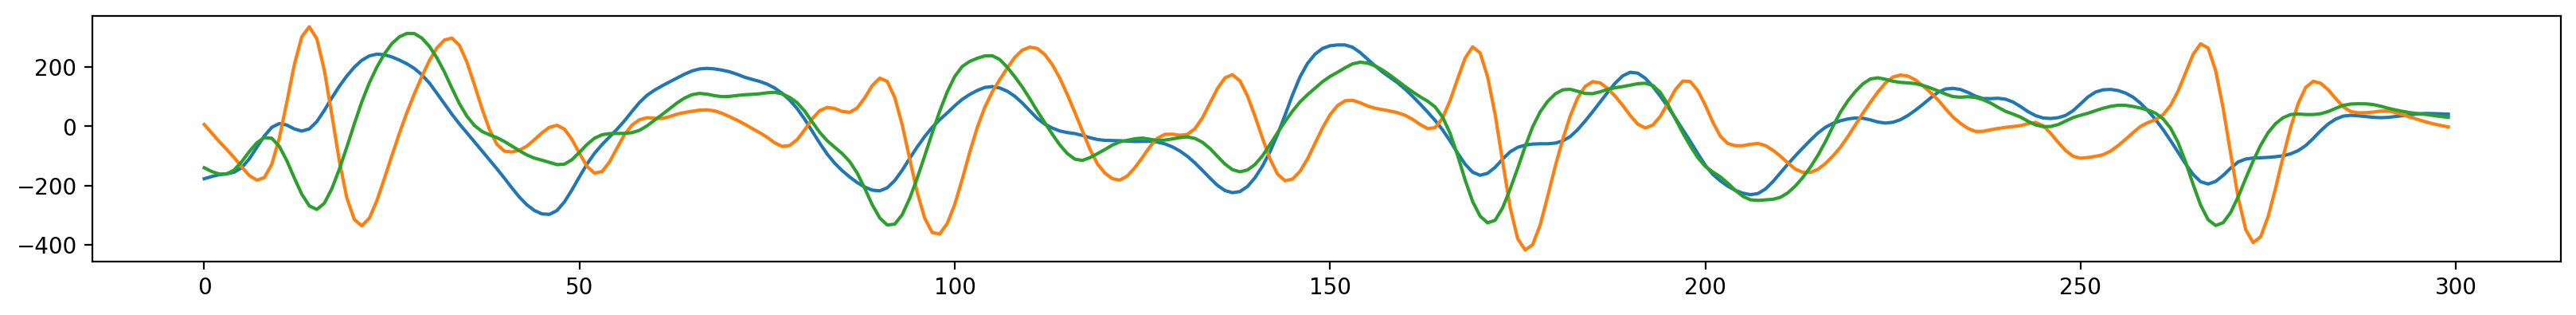

In [493]:
plt.figure(figsize=(20,2))
plt.plot(cv76); 
plt.plot(cv78); 
plt.plot(cv147); 
plt.savefig("../../figures/paper/template_conv.svg")

In [510]:
temp78[:,2].argmax()

21

In [524]:
temp78 = templates[78,20:80,311:317]
temp78 *= seg_short.max()/np.abs(temp78).max()
seg_post = seg_short.copy()
seg_post[4:64,:] = seg_post[4:64,:] - temp78

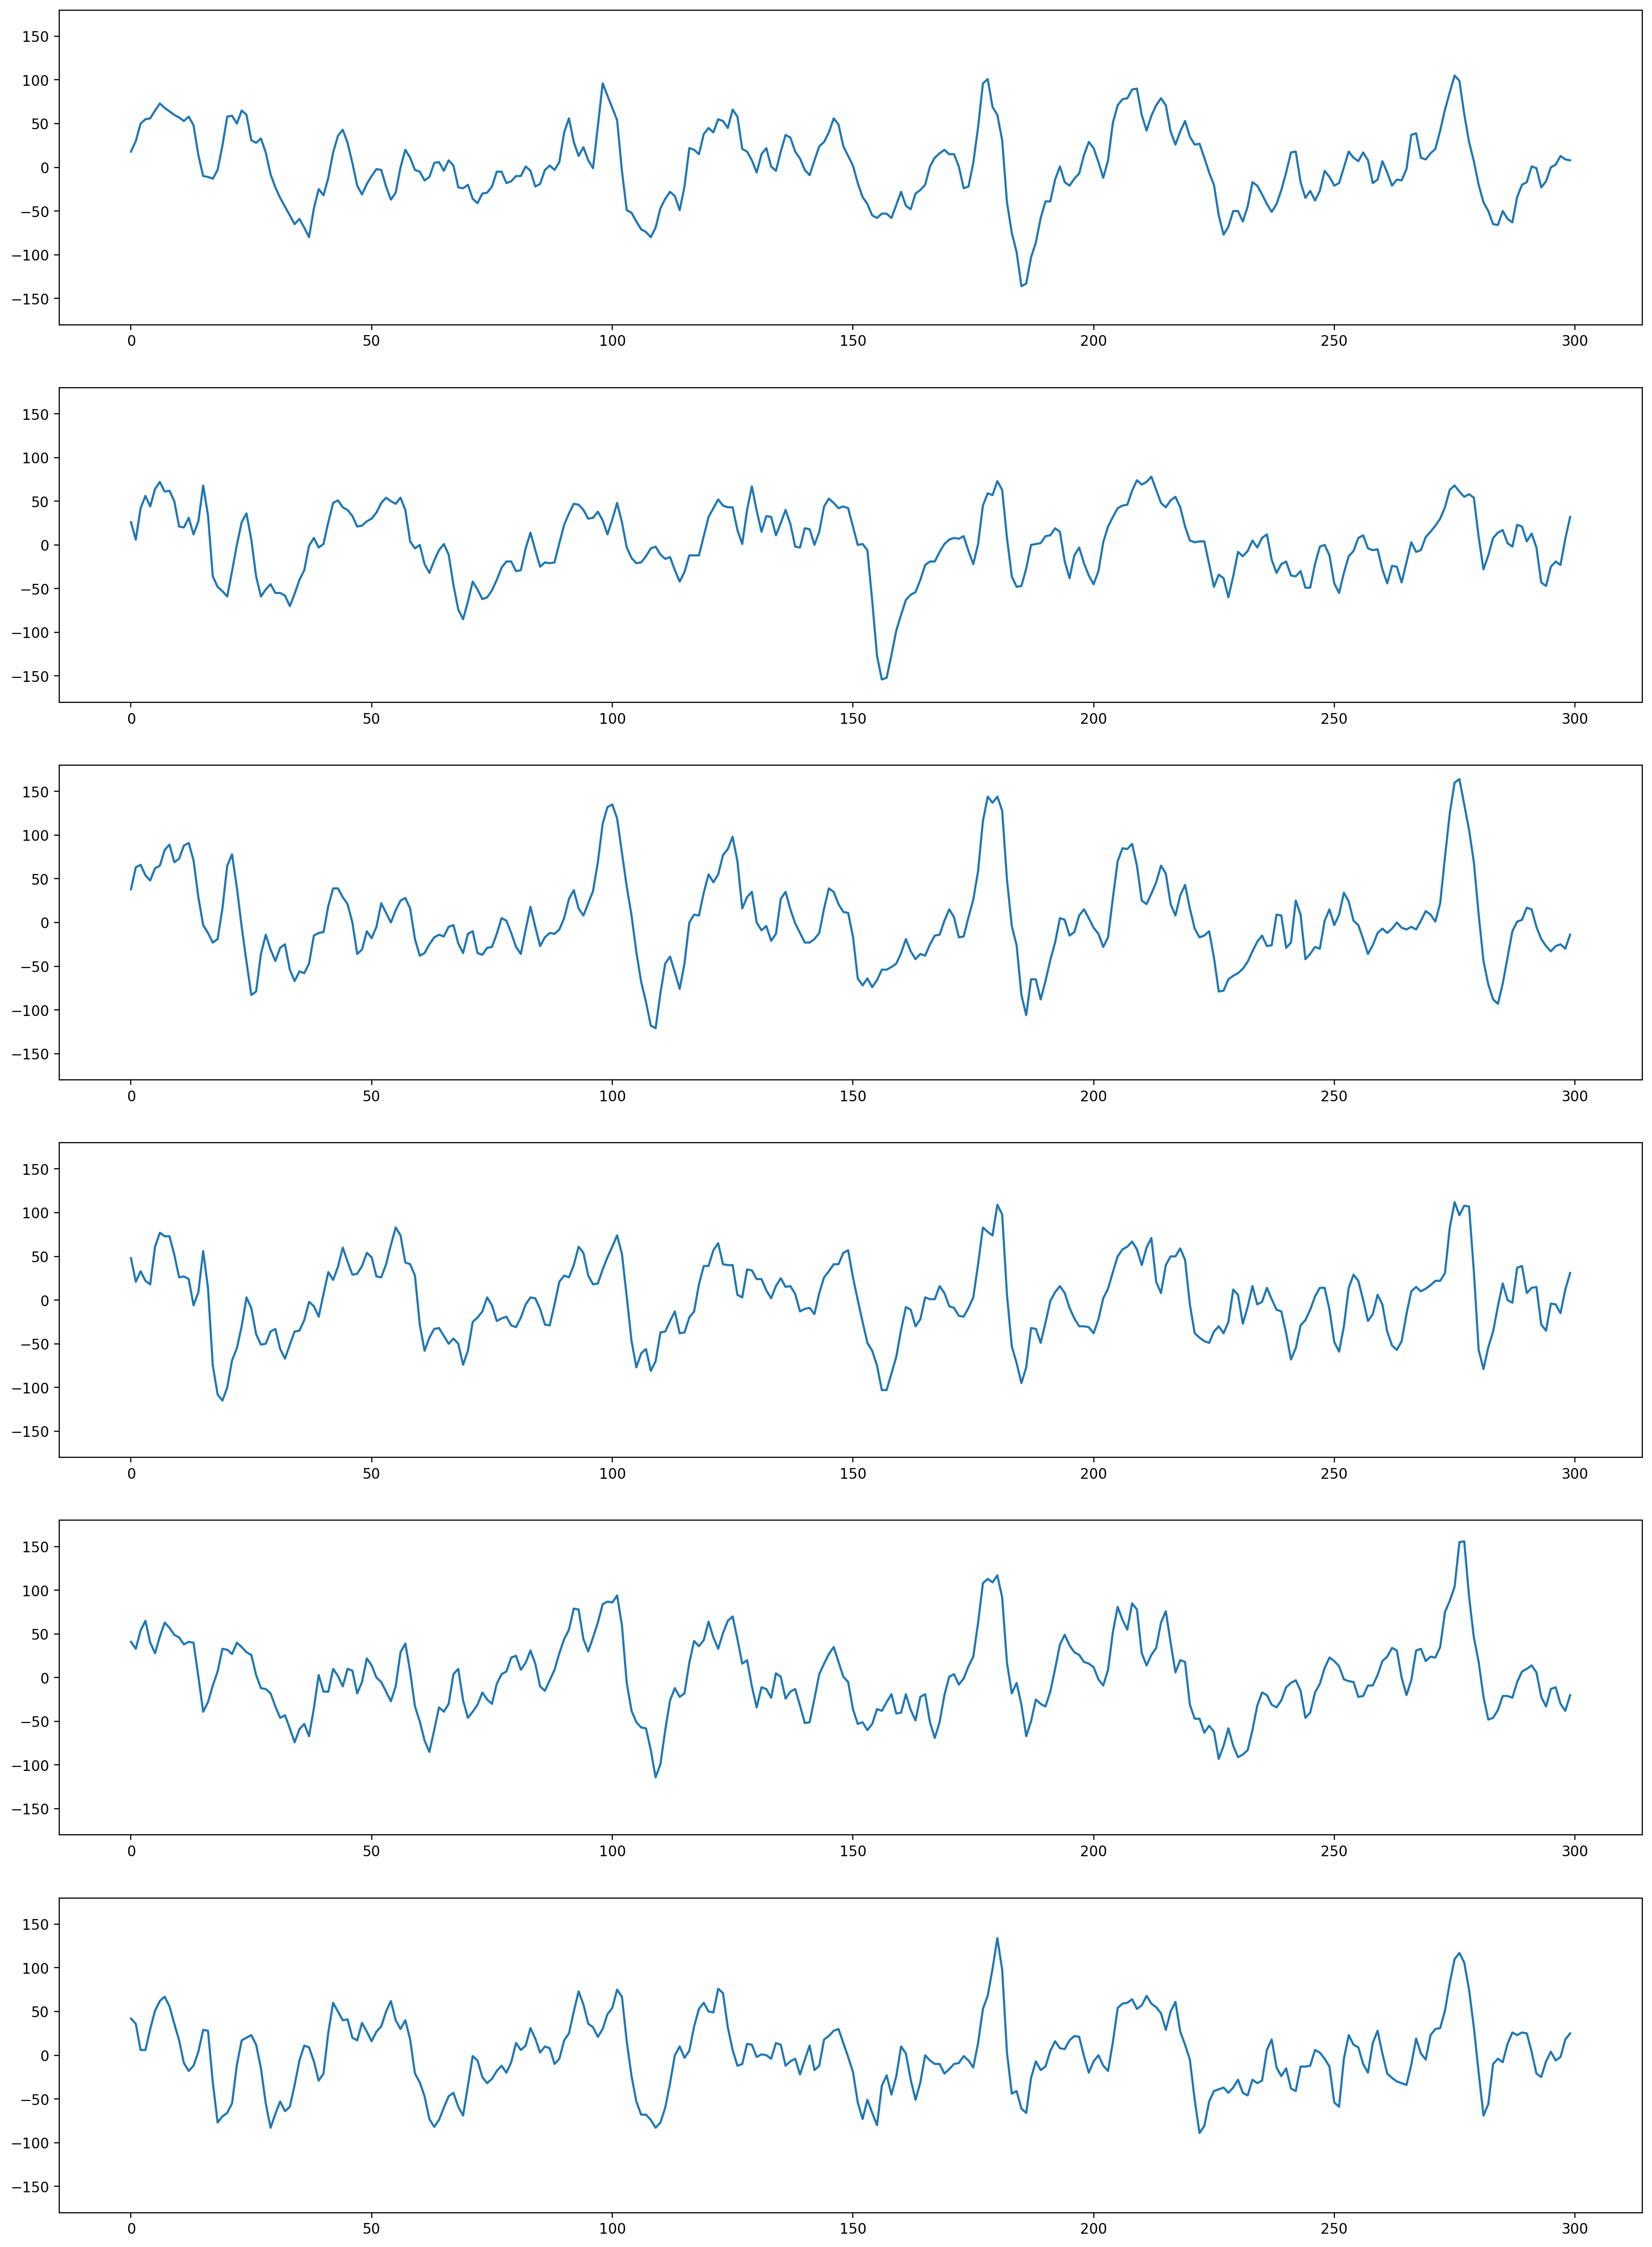

In [526]:
plt.figure(figsize=(20,28))
for i in range(6):
    plt.subplot(6, 1, i+1)
    plt.plot(seg_post[:, i]); plt.ylim([-180, 180])

plt.savefig("../../figures/paper/template_data_post.svg", transparent=True)